Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### <font color='cyan'> Sections in this notebook: <font>
I. Importing Skin Cancer Data 
    
    I.1. Importing all the important libraries
    I.2. Load using keras.preprocessing
    I.3. Visualize data

II. Create the model

    II.1. Normalize pixel values between (0,1)
    II.2. Building models
        II.2.1. One dropout layer after Dense layer
            II.2.1.1. First configuration
            II.2.1.2. Second configuration
        II.2.2. One dropout layer after each MaxPooling Layer
            II.2.2.1. First configuration
            II.2.2.2. Second configuration

III. Data Augmentation strategies
    
    III.1. Getting the class distribution
    III.2. First augmentation strategy
    III.3. Model Creation    
        III.3.1. First configuration without dropout
        III.3.2. First configuration with dropout
    III.4. Different augmentation strategy
        III.4.1 Perspective skewing
        III.4.2 Mirroring
        III.4.3 Shearing
        III.4.4 Random brightness
        III.4.5 Elastic distortions
    III.5. Playing around with the best combinations

IV. Conclusion
    

# <font color='goldenrod'> 1 </font>
### <font color='skyblue'>  I.1. </font>
$\Rightarrow$ <font color="asparagus"> Points </font>

# <font color='goldenrod'> I. Importing Skin Cancer Data </font> 

### <font color='skyblue'>  I.1. Importing all the important libraries </font> 

In [178]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [179]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [180]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [181]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

$\Rightarrow$ <font color="asparagus">The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively. </font> <br>
$\Rightarrow$ <font color="asparagus"> I'm loading the images from a local dir since I have a GPU locally. <br>

In [182]:
trainDir = r"D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train"
testDir = r"D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Test"

In [183]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(trainDir)
data_dir_test = pathlib.Path(testDir)

In [184]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


$\Rightarrow$ <font color="asparagus"> This assignment uses a dataset of about 2357 images of skin cancer types. <br> </font>

In [185]:
image_count_train + image_count_test

2357

### <font color='skyblue'>  I.2. Load using keras.preprocessing </font> 
Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [186]:
batch_size = 32
img_height = 180
img_width = 180

$\Rightarrow$ <font color="asparagus"> This assignment uses a dataset of about 2357 images of skin cancer types. <br> 

</font> Number of classes = 9

In [187]:
num_classes = len(os.listdir(data_dir_train))

In [188]:
num_classes

9

In [189]:
train_labels = os.listdir(data_dir_train)

In [190]:
train_labels

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

$\Rightarrow$ <font color="asparagus">  Create a dataset

#### Utility function that will be used in later sections

In [191]:
def get_train_val_ds(data_dir_train):
    #data_dir_train="path to directory with training data + data created using augmentor"
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "training",
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "validation",
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
    return train_ds, val_ds

Using 80% of the images for training, and 20% for validation.

In [192]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  validation_split=0.2,
                                  subset="training",
                                  seed=123,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [193]:
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  labels="inferred",
                                  validation_split=0.2,
                                  subset="training",
                                  class_names=train_labels,
                                  seed=123,
                                  image_size=(img_width, img_height),
                                  batch_size=batch_size) """

'\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n                                  data_dir_train,\n                                  labels="inferred",\n                                  validation_split=0.2,\n                                  subset="training",\n                                  class_names=train_labels,\n                                  seed=123,\n                                  image_size=(img_width, img_height),\n                                  batch_size=batch_size) '

In [194]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  validation_split=0.2,
                                  subset="validation",
                                  seed=123,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [195]:
"""val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  labels="inferred",
                                  validation_split=0.2,
                                  subset="validation",
                                  class_names=train_labels,
                                  seed=123,
                                  image_size=(img_width, img_height),
                                  batch_size=batch_size)
"""

'val_ds = tf.keras.preprocessing.image_dataset_from_directory(\n                                  data_dir_train,\n                                  labels="inferred",\n                                  validation_split=0.2,\n                                  subset="validation",\n                                  class_names=train_labels,\n                                  seed=123,\n                                  image_size=(img_width, img_height),\n                                  batch_size=batch_size)\n'

In [196]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### <font color='skyblue'>  I.3. Visualize data </font> 

#### Creating an empty dict 

In [197]:
def get_empty_dict():
    classes_obtained = {}
    for name in class_names:
        classes_obtained[name] = None
    return classes_obtained

In [198]:
import matplotlib.pyplot as plt

Procedure followed to visualize data: <br>
$\Rightarrow$ <font color="asparagus"> Create an empty dict <br> </font>
$\Rightarrow$  <font color="asparagus"> Loop through the dataset and cache one image per class <br> </font>
$\Rightarrow$  <font color="asparagus"> Once all 9 unique images(one per each label) is obtained, breka out early. </font>

In [199]:
cnt = 0
labels_obtained = 0
classes_obtained = get_empty_dict()
for images, labels in train_ds:
    if classes_obtained[class_names[labels[cnt]]] is None:
        classes_obtained[class_names[labels[cnt]]] = images[cnt].numpy().astype("uint8")
        labels_obtained += 1
    cnt += 1
    if labels_obtained >= 9:
        break

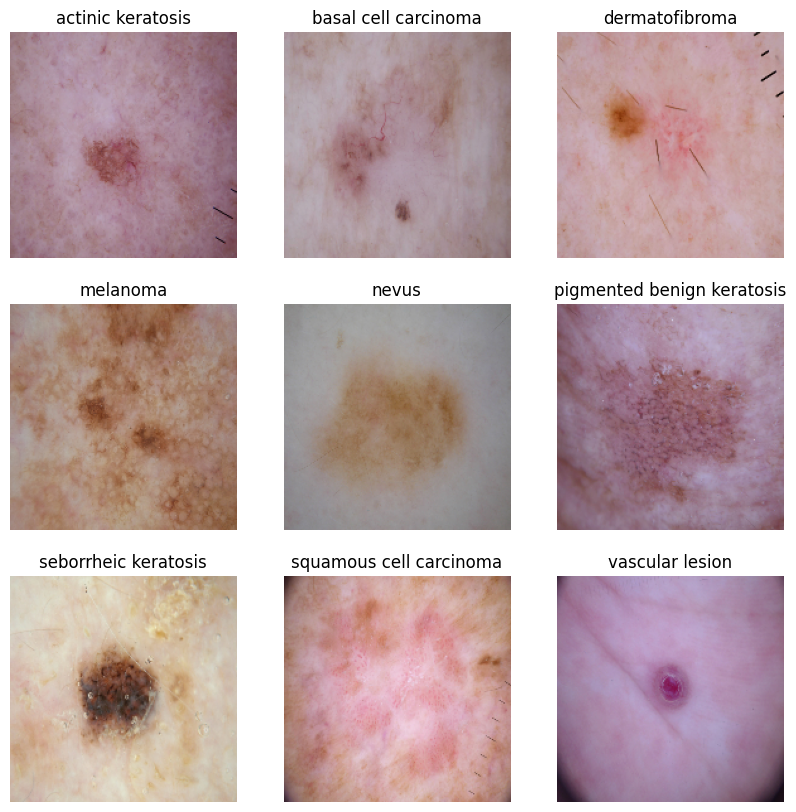

In [200]:
# Select one image from each class to plot
num_classes = len(class_names)
plt.figure(figsize=(10, 10))
cnt = 0
for label, img in classes_obtained.items():
    ax = plt.subplot(3,3, cnt + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    cnt += 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [201]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# <font color='goldenrod'> II. Create the model

### <font color='skyblue'>  II.1. Normalize pixel values between (0,1) </font> 

In [202]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) * (1.0/255)
    return image, label

In [203]:
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

$\Rightarrow$ <font color="asparagus"> Some initialization parameters

In [204]:
filter_size = (3,3)

In [205]:
nFeatures = 16

In [206]:
input_size = (180,180,3)

In [207]:
dropOutPct = 0.25

In [208]:
nNumNeuronsDense = 512

### <font color='skyblue'>  II.2. Building models </font>

#### II.2.1. One dropout layer after Dense layer. 

##### $\Rightarrow$ <font color="asparagus"> II.2.1.1. First configuration <br>
Number of features at the input layer = 16. <br> 
Post that every layer will have twice the previous layer. <br>
Total number of conv layers = 4. <br>
Dropout of 40% after dense layer <br>

In [209]:
def get_first_config_model():
    nFeatures = 16
    model = Sequential()
    model.add(Conv2D(nFeatures, 
                 filter_size, 
                 padding="same",
                 input_shape=input_size))
    model.add(Activation('relu'))
    model.add(Conv2D(nFeatures, filter_size)) # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Activation('relu'))
    #model.add(Dropout(dropOutPct))

    nFeatures = nFeatures * 2 
    model.add(Conv2D(nFeatures, filter_size, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(nFeatures, filter_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(dropOutPct))

    nFeatures = nFeatures * 2 
    model.add(Conv2D(nFeatures, filter_size, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(nFeatures, filter_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(dropOutPct))

    nFeatures = nFeatures * 2 
    model.add(Conv2D(nFeatures, filter_size, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(nFeatures, filter_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(nNumNeuronsDense))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(len(class_names)))
    model.add(Activation('softmax'))
    return model

In [210]:
model = get_first_config_model()

In [211]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_176 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 activation_222 (Activation)  (None, 180, 180, 16)     0         
                                                                 
 conv2d_177 (Conv2D)         (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 activation_223 (Activation)  (None, 89, 89, 16)       0         
                                                                 
 conv2d_178 (Conv2D)         (None, 89, 89, 32)        4640      
                                                     

$\Rightarrow$ <font color="asparagus"> Compile the model
Choose an appropirate optimiser and loss function for model training 

In [212]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

$\Rightarrow$ <font color="asparagus"> Train the model

In [213]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 104ms/step - loss: 2.0716 - accuracy: 0.1758 - val_loss: 2.0340 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0136 - accuracy: 0.2015 - val_loss: 2.0431 - val_accuracy: 0.2081
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 2.0254 - accuracy: 0.2148 - val_loss: 2.0232 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 2.0211 - accuracy: 0.2059 - val_loss: 2.0204 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.9979 - accuracy: 0.2338 - val_loss: 1.9248 - val_accuracy: 0.2819
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8609 - accuracy: 0.3041 - val_loss: 1.7454 - val_accuracy: 0.3445
Epoch 7/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7283 - accuracy: 0.3521 - val_loss: 1.6828 - val_accuracy: 0.4094
Epoch 8/20


$\Rightarrow$ <font color="asparagus"> Visualizing training results

In [214]:
def visual_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

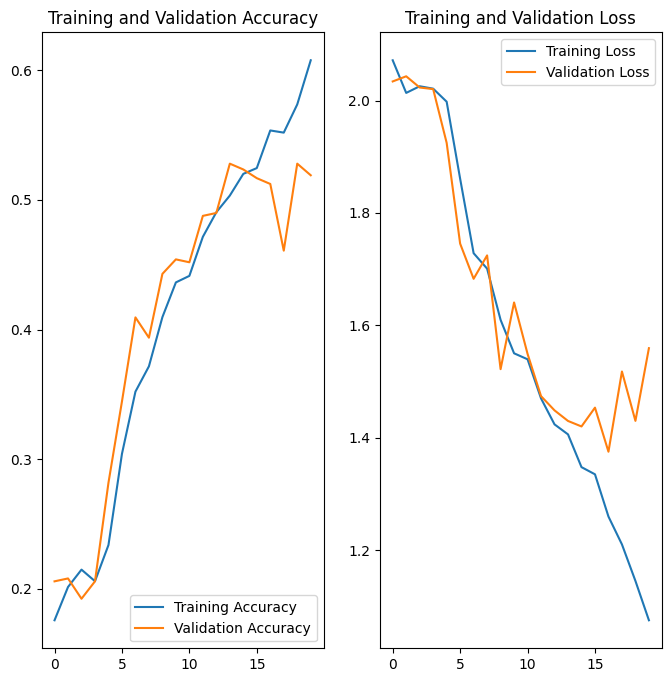

In [215]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> For this configuration, there seems to be a little overfitting. Training and validation accuracies are 61% and 52%. <br> </font>
$\Rightarrow$ <font color="asparagus"> I've tried various other configurations as well. Eg: I restricted the number of conv layers to 3 and increased the number of features to 32 and 64. I observed that the model started overfitting in this config too. <br>

##### $\Rightarrow$ <font color="asparagus"> II.2.1.2. Second Configuration <br>
Number of features at the input layer = 32. <br> 
Post that every layer will have twice the previous layer. <br>
Total number of conv layers = 3. <br>
Dropout of 40% after dense layer <br>

#### Here's an example of nFeatures = 32 and 3 conv layers

In [216]:
nFeatures = 32
model = Sequential()
model.add(Conv2D(nFeatures, 
                 filter_size, 
                 padding="same",
                 input_shape=input_size))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size)) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(dropOutPct))

model.add(Flatten())
model.add(Dense(nNumNeuronsDense))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

In [217]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [218]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 83ms/step - loss: 2.0965 - accuracy: 0.2015 - val_loss: 1.9983 - val_accuracy: 0.2148
Epoch 2/20
56/56 [==============================] - 5s 82ms/step - loss: 1.9102 - accuracy: 0.2952 - val_loss: 1.7369 - val_accuracy: 0.3624
Epoch 3/20
56/56 [==============================] - 5s 81ms/step - loss: 1.7370 - accuracy: 0.3800 - val_loss: 1.6085 - val_accuracy: 0.4474
Epoch 4/20
56/56 [==============================] - 5s 80ms/step - loss: 1.7508 - accuracy: 0.3538 - val_loss: 1.6377 - val_accuracy: 0.3960
Epoch 5/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6544 - accuracy: 0.4118 - val_loss: 1.6337 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 5s 80ms/step - loss: 1.6050 - accuracy: 0.4235 - val_loss: 1.5616 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4778 - accuracy: 0.4844 - val_loss: 1.4310 - val_accuracy: 0.5034
Epoch 8/20
56

$\Rightarrow$ <font color="asparagus"> Visualizing training results

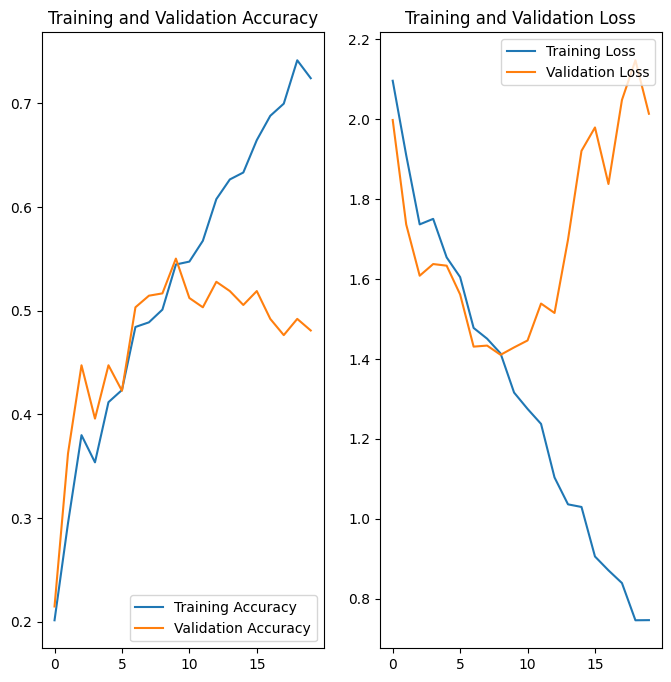

In [219]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> As pointed out earlier, the model starts overfitting. The accuracy plots showed that the training accuracy kept increasing and reached as high as 72% at the 20th epoch. But the validation accuracy seemed to have plateued around 48%. <br> </font>
$\Rightarrow$ <font color="asparagus"> The loss plots also suggests  the same thing. The validation loss after a certain epoch (~10) starts increasing. <br> </font> 

#### II.2.2. One dropout layer after each maxPooling Layer

#### Let's see if adding dropout layer after each convolutional layer adds any benefits


##### $\Rightarrow$ <font color="asparagus"> II.2.2.1. First configuration <br>
Number of features at the input layer = 16. <br> 
Post that every layer will have twice the previous layer. <br>
Dropout of 25% after every max pooling layer <br>
Total number of conv layers = 4. <br>
Dropout of 40% after dense layer <br>

In [220]:
dropOutPct # Using 25% dropout after every max pooling layer

0.25

In [221]:
model = get_first_config_model()

$\Rightarrow$ <font color="asparagus">  Compiling the model

In [222]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

$\Rightarrow$ <font color="asparagus">  Training the model

In [223]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 47ms/step - loss: 2.0685 - accuracy: 0.1903 - val_loss: 2.0371 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0340 - accuracy: 0.2026 - val_loss: 2.0369 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 2.0200 - accuracy: 0.2115 - val_loss: 2.0318 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.9661 - accuracy: 0.2439 - val_loss: 1.8268 - val_accuracy: 0.3110
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8507 - accuracy: 0.2919 - val_loss: 1.7851 - val_accuracy: 0.3289
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8011 - accuracy: 0.3343 - val_loss: 1.8018 - val_accuracy: 0.3221
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 1.7298 - accuracy: 0.3348 - val_loss: 1.6418 - val_accuracy: 0.4027
Epoch 8/20
56

$\Rightarrow$ <font color="asparagus">  Visualizing the results

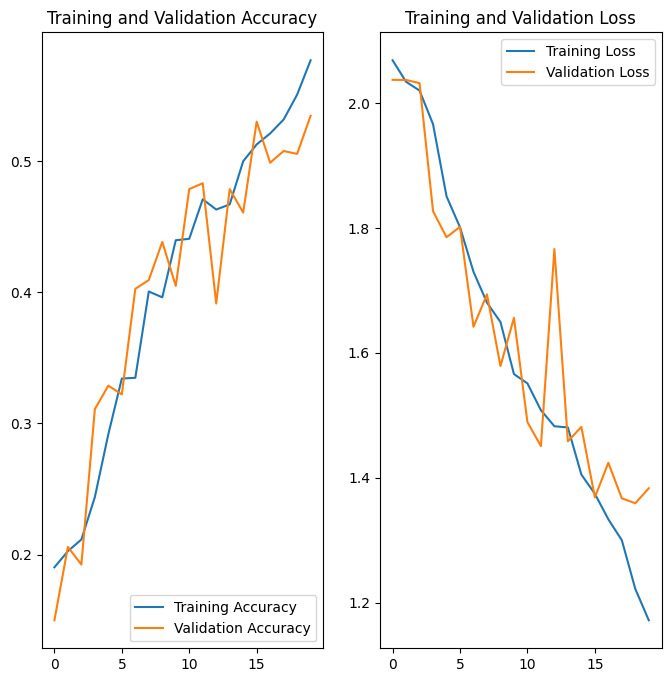

In [224]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> The model accuracy has dropped a bit on the training data(~57%), but one thing is for certain, the training and validation accuracy are quite nearby. <br> </font>
$\Rightarrow$ <font color="asparagus"> Having said that, I would like for the accuracies to be a little more closer. <br> </font>
$\Rightarrow$ <font color="asparagus"> Let us try adding dropout layers in the second config which was definitely overfitting in the first run.

##### $\Rightarrow$ <font color="asparagus"> II.2.2.2. Second configuration <br>
Number of features at the input layer = 32. <br> 
Post that every layer will have twice the previous layer. <br>
Dropout of 25% after every max pooling layer <br>
Total number of conv layers = 3. <br>
Dropout of 40% after dense layer <br>

In [225]:
nFeatures = 32
model = Sequential()
model.add(Conv2D(nFeatures, 
                 filter_size, 
                 padding="same",
                 input_shape=input_size))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size)) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropOutPct))

model.add(Flatten())
model.add(Dense(nNumNeuronsDense))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

$\Rightarrow$ <font color="asparagus">  Compiling the model

In [226]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

$\Rightarrow$ <font color="asparagus">  Training the model

In [227]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 88ms/step - loss: 2.2436 - accuracy: 0.1975 - val_loss: 2.0313 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0217 - accuracy: 0.1981 - val_loss: 2.0152 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0128 - accuracy: 0.2411 - val_loss: 2.0010 - val_accuracy: 0.2975
Epoch 4/20
56/56 [==============================] - 5s 84ms/step - loss: 1.9953 - accuracy: 0.2467 - val_loss: 1.8944 - val_accuracy: 0.3333
Epoch 5/20
56/56 [==============================] - 5s 84ms/step - loss: 1.7984 - accuracy: 0.3672 - val_loss: 1.6525 - val_accuracy: 0.4183
Epoch 6/20
56/56 [==============================] - 5s 84ms/step - loss: 1.6673 - accuracy: 0.4018 - val_loss: 1.5981 - val_accuracy: 0.4609
Epoch 7/20
56/56 [==============================] - 5s 84ms/step - loss: 1.5749 - accuracy: 0.4263 - val_loss: 1.6346 - val_accuracy: 0.4116
Epoch 8/20
56

$\Rightarrow$ <font color="asparagus">  Visualizing the results

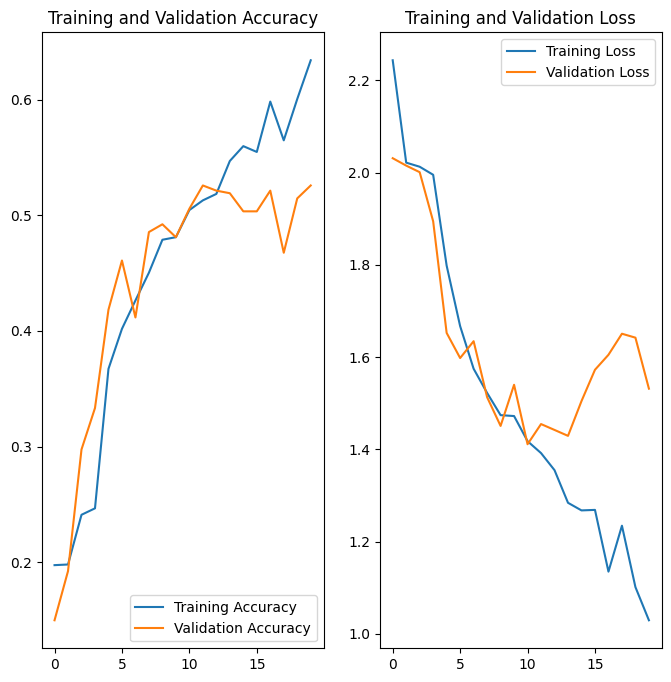

In [228]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Overfitting still exists even after adding dropout layers in between. <br> </font>
$\Rightarrow$ <font color="asparagus"> We need to alter the data in some way to avoid this problem.

# <font color='goldenrod'> III. Data Augmentation strategies </font> 

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. <br>Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [229]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [230]:
def get_empty_dict():
    classes_obtained = {}
    for name in class_names:
        classes_obtained[name] = 0
    return classes_obtained

In [231]:
samplesPerClassDict = get_empty_dict()

### <font color='skyblue'>  III.1. Getting the class distribution </font> 

#### Unbatch the dataset, get dataset's iterator and loop through it to obtain number of samples per class.

In [232]:
train_ds_unb = train_ds.unbatch()
# Get the iterator for the dataset
iterator = train_ds_unb.as_numpy_iterator()

In [233]:
# Loop through the images in the dataset
for i, (image, label) in enumerate(iterator):
    # Map the label to the corresponding class name
    class_name = class_names[label]
    samplesPerClassDict[class_name] += 1 # Storing in this dict

In [234]:
sum(list(samplesPerClassDict.values()))

1792

In [235]:
samplesPerClassDict

{'actinic keratosis': 92,
 'basal cell carcinoma': 309,
 'dermatofibroma': 77,
 'melanoma': 352,
 'nevus': 277,
 'pigmented benign keratosis': 370,
 'seborrheic keratosis': 58,
 'squamous cell carcinoma': 142,
 'vascular lesion': 115}

#### Let's plot a pie chart

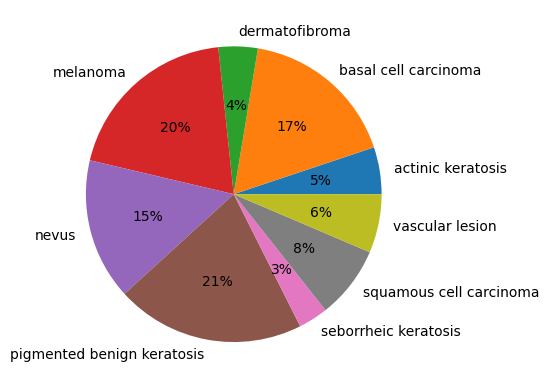

In [236]:
# plotting data on chart
plt.pie(samplesPerClassDict.values(), labels=samplesPerClassDict.keys(), autopct='%.0f%%')
plt.show()

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> The above pie chart tells us that melanoma and pigmented benign keratosis have the highest number of samples(~20% each). <br> </font>
$\Rightarrow$ <font color="asparagus"> Whereas, the other classes have lesser number of samples, with dermatafibroma and actinic keratosis having the lowest number of samples (4% and 5% respectively) <br> </font> 

### <font color='skyblue'>  III.2. First augmentation strategy <br></font> 
Just adding rotation to the mix

$\Rightarrow$ <font color="asparagus"> Data augmentation using Augmentor <br>
(https://augmentor.readthedocs.io/en/master/)

In [237]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


#### Only trying: (probability=0.7, max_left_rotation=10, max_right_rotation=10)

In [238]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A9772258A0>: 100%|██████████| 500/500 [00:02<00:00, 235.70 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A97717AB90>: 100%|██████████| 500/500 [00:02<00:00, 241.96 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A977155840>: 100%|██████████| 500/500 [00:02<00:00, 231.54 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x2A975D408B0>: 100%|██████████| 500/500 [00:10<00:00, 46.26 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97725AD10>: 100%|██████████| 500/500 [00:08<00:00, 56.68 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975D63040>: 100%|██████████| 500/500 [00:02<00:00, 232.61 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A975C714B0>: 100%|██████████| 500/500 [00:04<00:00, 103.15 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A97725ADD0>: 100%|██████████| 500/500 [00:02<00:00, 236.46 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975B85990>: 100%|██████████| 500/500 [00:02<00:00, 229.62 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [239]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [240]:
from glob import glob

In [241]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\DDownloads\\UpGrad\\NeuralNetwork\\Data\\CNN_assignment\\ISIC_SkinCancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_502f70fc-49a9-4729-83cc-0e068736909a.jpg',
 'D:\\DDownloads\\UpGrad\\NeuralNetwork\\Data\\CNN_assignment\\ISIC_SkinCancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_563796e5-092f-45d6-9c78-bbf5aa3acddc.jpg',
 'D:\\DDownloads\\UpGrad\\NeuralNetwork\\Data\\CNN_assignment\\ISIC_SkinCancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7b54d461-ef55-430b-824d-5744e71853b2.jpg',
 'D:\\DDownloads\\UpGrad\\NeuralNetwork\\Data\\CNN_assignment\\ISIC_SkinCancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b35adc6a-3c92-41f9-a19d-17fbeb7b386f.jpg',
 'D:\\DDownloads\\UpGrad\\NeuralNetwork\\Data\\CNN_assignment\\ISIC_SkinCancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c06450a1-e797-48bb-aa53-67595b8bd915.j

In [242]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [243]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [244]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

#### This is the new distribution

In [245]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

#### Earlier we saw it was: 

In [246]:
samplesPerClassDict

{'actinic keratosis': 92,
 'basal cell carcinoma': 309,
 'dermatofibroma': 77,
 'melanoma': 352,
 'nevus': 277,
 'pigmented benign keratosis': 370,
 'seborrheic keratosis': 58,
 'squamous cell carcinoma': 142,
 'vascular lesion': 115}

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process. <br> </font>

In [247]:
batch_size = 32
img_height = 180
img_width = 180

In [248]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [249]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [250]:
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

In [251]:
input_size

(180, 180, 3)

In [252]:
nNumNeuronsDense

512

### <font color='skyblue'> III.3. Model Creation <br>

##### $\Rightarrow$ <font color="asparagus"> III.3.1. First configuration without dropout <br>

In [253]:
model = get_first_config_model()

In [254]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [255]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 12s 65ms/step - loss: 2.1821 - accuracy: 0.1372 - val_loss: 2.1859 - val_accuracy: 0.1158
Epoch 2/30
169/169 [==============================] - 10s 55ms/step - loss: 1.9822 - accuracy: 0.2263 - val_loss: 1.7535 - val_accuracy: 0.3229
Epoch 3/30
169/169 [==============================] - 10s 55ms/step - loss: 1.7123 - accuracy: 0.3427 - val_loss: 1.6050 - val_accuracy: 0.3912
Epoch 4/30
169/169 [==============================] - 9s 54ms/step - loss: 1.5110 - accuracy: 0.4154 - val_loss: 1.4454 - val_accuracy: 0.4454
Epoch 5/30
169/169 [==============================] - 9s 54ms/step - loss: 1.4059 - accuracy: 0.4496 - val_loss: 1.3859 - val_accuracy: 0.4388
Epoch 6/30
169/169 [==============================] - 9s 54ms/step - loss: 1.2449 - accuracy: 0.5180 - val_loss: 1.2162 - val_accuracy: 0.5323
Epoch 7/30
169/169 [==============================] - 10s 56ms/step - loss: 1.0921 - accuracy: 0.5853 - val_loss: 1.0152 - val_accuracy: 0.

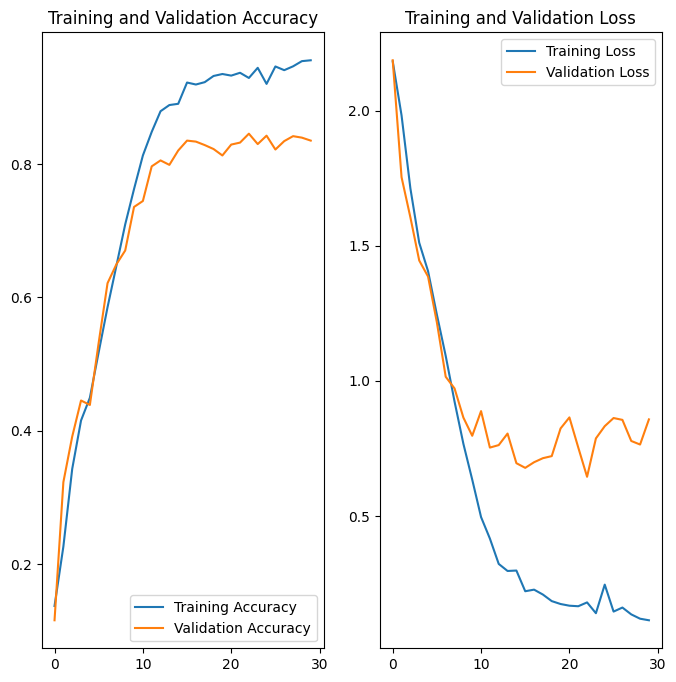

In [256]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> We just made sure each class has 500 samples each. <br> We did this by using the augmentor class and our strategy was just just rotation with maximum left and right rotation of 10 degrees. <br> </font>
$\Rightarrow$ <font color="asparagus"> But there are still traces of overfitting, with the training accuracy as high as 95% and validation accuracy going up to 83%. <br> </font>
$\Rightarrow$ <font color="asparagus"> Let's try adding a dropout layer first and then try with better augmentation strategies. <br> </font>

##### $\Rightarrow$ <font color="asparagus"> III.3.2. Second configuration with dropout <br>

In [261]:
nFeatures = 16
model = Sequential()
model.add(Conv2D(nFeatures, 
                 filter_size, 
                 padding="same",
                 input_shape=input_size))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size)) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropOutPct))

nFeatures = nFeatures * 2 
model.add(Conv2D(nFeatures, filter_size, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(nFeatures, filter_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(nNumNeuronsDense))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

In [262]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [263]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 51s 289ms/step - loss: 2.1880 - accuracy: 0.1382 - val_loss: 2.1901 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 10s 59ms/step - loss: 2.1793 - accuracy: 0.1387 - val_loss: 2.1880 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 10s 58ms/step - loss: 2.1789 - accuracy: 0.1441 - val_loss: 2.1877 - val_accuracy: 0.1403
Epoch 4/30
169/169 [==============================] - 10s 56ms/step - loss: 2.1783 - accuracy: 0.1397 - val_loss: 2.1885 - val_accuracy: 0.1403
Epoch 5/30
169/169 [==============================] - 10s 56ms/step - loss: 2.1781 - accuracy: 0.1367 - val_loss: 2.1894 - val_accuracy: 0.1433
Epoch 6/30
169/169 [==============================] - 10s 57ms/step - loss: 2.1775 - accuracy: 0.1417 - val_loss: 2.1813 - val_accuracy: 0.1433
Epoch 7/30
169/169 [==============================] - 10s 58ms/step - loss: 2.1767 - accuracy: 0.1374 - val_loss: 2.1883 - val_accuracy

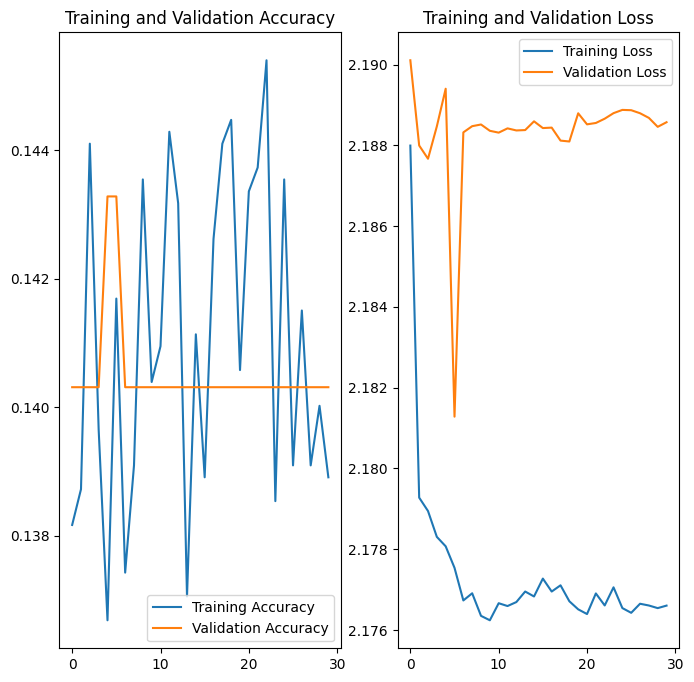

In [264]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Massive dip in accuracy on this augmented set somehow<br> </font>
$\Rightarrow$ <font color="asparagus"> Let's try a better augmentation strategy using augmentor lib <br> </font>


### <font color='skyblue'>  III.4. Different augmentation strategies </font> 

$\Rightarrow$ <font color="asparagus"> From the augmentor library's documentation I see the following operations: <br> </font>
Perspective skewing: I think we can try skewing. <br>
Elastic distortions: Since these are medical images, I'm not sure if adding elastic distortions will add value. But we will try this in a separate segment <br>
Rotations: We will continue to add this, it definitely improved the performance <br>
Shearing: Again, adding shears might not make sense for medical images. But we can try this in a separate segment <br>
Cropping: We should not crop images, since information can be lost around the edges. We must be careful with medical applications. <br>
Mirroring: We can try flip_random() <br>
$\Rightarrow$ <font color="asparagus"> We will try each of these strategies in isolation, choose the best ones and mix them together to see how our result changes. <br>

##### $\Rightarrow$ <font color="asparagus"> III.4.1 Perspective skewing <br> </font>


In [265]:
samplesPerClassDict

{'actinic keratosis': 92,
 'basal cell carcinoma': 309,
 'dermatofibroma': 77,
 'melanoma': 352,
 'nevus': 277,
 'pigmented benign keratosis': 370,
 'seborrheic keratosis': 58,
 'squamous cell carcinoma': 142,
 'vascular lesion': 115}

In [266]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    p.flip_left_right(probability=0.4)
    p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.flip_random(probability=0.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975D63040>: 100%|██████████| 500/500 [00:02<00:00, 235.46 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906926890>: 100%|██████████| 500/500 [00:02<00:00, 242.72 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906979CF0>: 100%|██████████| 500/500 [00:02<00:00, 235.90 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A739359840>: 100%|██████████| 500/500 [00:09<00:00, 51.96 Samples/s] 


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738FFAF50>: 100%|██████████| 500/500 [00:08<00:00, 60.29 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90697B730>: 100%|██████████| 500/500 [00:02<00:00, 222.76 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A97C40E260>: 100%|██████████| 500/500 [00:04<00:00, 110.33 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738FFBE20>: 100%|██████████| 500/500 [00:02<00:00, 240.56 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A739421060>: 100%|██████████| 500/500 [00:02<00:00, 233.10 Samples/s]                  


In [267]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [268]:
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

##### $\Rightarrow$ <font color="asparagus"> Deploying model <br> </font>

In [269]:
model = get_first_config_model()

In [270]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [271]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 13s 70ms/step - loss: 2.0877 - accuracy: 0.1769 - val_loss: 1.9125 - val_accuracy: 0.2435
Epoch 2/30
169/169 [==============================] - 11s 63ms/step - loss: 1.8028 - accuracy: 0.2867 - val_loss: 1.6686 - val_accuracy: 0.3615
Epoch 3/30
169/169 [==============================] - 9s 54ms/step - loss: 1.6434 - accuracy: 0.3553 - val_loss: 1.5607 - val_accuracy: 0.4009
Epoch 4/30
169/169 [==============================] - 9s 53ms/step - loss: 1.4870 - accuracy: 0.4201 - val_loss: 1.4511 - val_accuracy: 0.4336
Epoch 5/30
169/169 [==============================] - 9s 53ms/step - loss: 1.4212 - accuracy: 0.4386 - val_loss: 1.4608 - val_accuracy: 0.4232
Epoch 6/30
169/169 [==============================] - 10s 59ms/step - loss: 1.3798 - accuracy: 0.4496 - val_loss: 1.3701 - val_accuracy: 0.4573
Epoch 7/30
169/169 [==============================] - 10s 58ms/step - loss: 1.3247 - accuracy: 0.4844 - val_loss: 1.3953 - val_accuracy: 0.

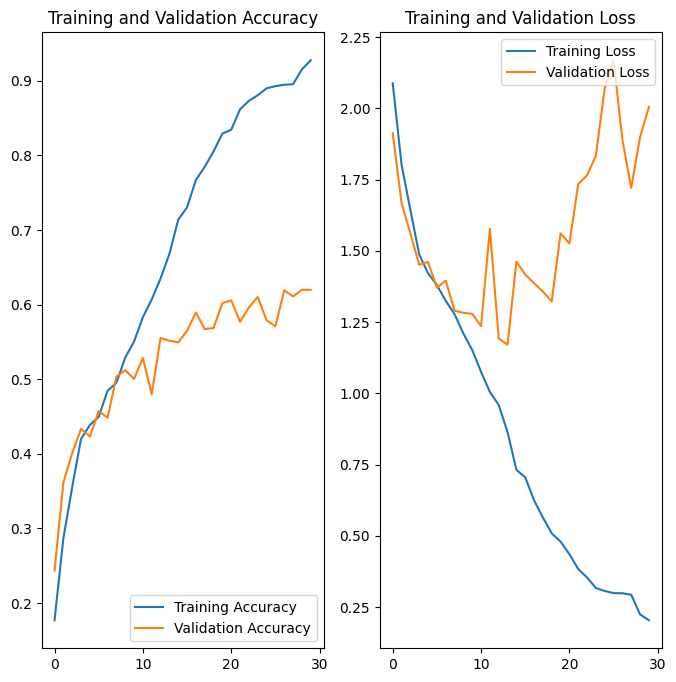

In [272]:
visual_training_results(history)

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Well, with skewing the model is definitely overfitting. Training accuracy is as high as 92% while validation accuracy is only 62%.

##### $\Rightarrow$ <font color="asparagus"> III.4.2 Mirroring <br> </font>


In [273]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.flip_left_right(probability=0.4)
    #p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_random(probability=0.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97F5F4EB0>: 100%|██████████| 500/500 [00:01<00:00, 420.07 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975F78D00>: 100%|██████████| 500/500 [00:01<00:00, 428.35 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A975F7BDF0>: 100%|██████████| 500/500 [00:01<00:00, 407.40 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A97D275210>: 100%|██████████| 500/500 [00:03<00:00, 153.86 Samples/s] 


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2A738FFAEC0>: 100%|██████████| 500/500 [00:02<00:00, 186.66 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A907395840>: 100%|██████████| 500/500 [00:01<00:00, 398.95 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A97C42B640>: 100%|██████████| 500/500 [00:01<00:00, 285.65 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A738FFB2E0>: 100%|██████████| 500/500 [00:01<00:00, 441.99 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90697BD90>: 100%|██████████| 500/500 [00:01<00:00, 429.09 Samples/s]                  


In [274]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [275]:
model = get_first_config_model()

In [276]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [277]:
from keras.callbacks import EarlyStopping

In [278]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [279]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 12s 64ms/step - loss: 2.1829 - accuracy: 0.1315 - val_loss: 2.1975 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 10s 55ms/step - loss: 2.1799 - accuracy: 0.1348 - val_loss: 2.1978 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 10s 55ms/step - loss: 2.1713 - accuracy: 0.1560 - val_loss: 2.2770 - val_accuracy: 0.1396
Epoch 4/30
169/169 [==============================] - 10s 55ms/step - loss: 2.0035 - accuracy: 0.2281 - val_loss: 1.8218 - val_accuracy: 0.2866
Epoch 5/30
169/169 [==============================] - 10s 55ms/step - loss: 1.7848 - accuracy: 0.3004 - val_loss: 1.7144 - val_accuracy: 0.3571
Epoch 6/30
169/169 [==============================] - 10s 54ms/step - loss: 1.7200 - accuracy: 0.3322 - val_loss: 1.6500 - val_accuracy: 0.3682
Epoch 7/30
169/169 [==============================] - 10s 55ms/step - loss: 1.5804 - accuracy: 0.3908 - val_loss: 1.5328 - val_accuracy:

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> So, mirroring seems to be beneficial. Training and validation accuracy have increased. Although overfitting is still a problem, but validation accuracy is not as bad as when we tried skewing. <br> </font> 
$\Rightarrow$ <font color="asparagus"> It might be even more helpful in tandem with other operations like rotation. We will try this later

##### $\Rightarrow$ <font color="asparagus"> III.4.3 Shearing <br> </font>


In [280]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.flip_left_right(probability=0.4)
    #p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.shear(probability=0.7,max_shear_left=10,max_shear_right=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A97D2B7700>: 100%|██████████| 500/500 [00:02<00:00, 231.64 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A97D290820>: 100%|██████████| 500/500 [00:02<00:00, 234.69 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906BC9AE0>: 100%|██████████| 500/500 [00:02<00:00, 229.10 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A975C647C0>: 100%|██████████| 500/500 [00:11<00:00, 41.75 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x2A8FE9EB8B0>: 100%|██████████| 500/500 [00:10<00:00, 49.94 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906978490>: 100%|██████████| 500/500 [00:02<00:00, 213.99 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A906ABA800>: 100%|██████████| 500/500 [00:05<00:00, 96.34 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A8FE9EB700>: 100%|██████████| 500/500 [00:02<00:00, 189.28 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97F5F6050>: 100%|██████████| 500/500 [00:03<00:00, 166.29 Samples/s]                  


In [281]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [282]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [283]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 17s 91ms/step - loss: 1.9502 - accuracy: 0.2385 - val_loss: 1.7447 - val_accuracy: 0.3207
Epoch 2/30
169/169 [==============================] - 12s 66ms/step - loss: 1.6770 - accuracy: 0.3694 - val_loss: 1.6018 - val_accuracy: 0.4009
Epoch 3/30
169/169 [==============================] - 12s 67ms/step - loss: 1.5277 - accuracy: 0.4067 - val_loss: 1.4987 - val_accuracy: 0.4209
Epoch 4/30
169/169 [==============================] - 10s 55ms/step - loss: 1.3712 - accuracy: 0.4790 - val_loss: 1.3540 - val_accuracy: 0.4633
Epoch 5/30
169/169 [==============================] - 10s 55ms/step - loss: 1.2238 - accuracy: 0.5339 - val_loss: 1.1744 - val_accuracy: 0.5724
Epoch 6/30
169/169 [==============================] - 10s 55ms/step - loss: 1.0827 - accuracy: 0.5985 - val_loss: 0.9993 - val_accuracy: 0.6325
Epoch 7/30
169/169 [==============================] - 9s 54ms/step - loss: 0.8569 - accuracy: 0.6754 - val_loss: 0.9116 - val_accuracy: 

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Oh yes, shear definitely helps. Though overfitting is there,  the validation accuracy has risen to 83%<br> </font> 
$\Rightarrow$ <font color="asparagus"> It might be even more helpful in tandem with rotation. We will try this later

##### $\Rightarrow$ <font color="asparagus"> III.4.4 Random brightness <br> </font>


In [284]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.flip_left_right(probability=0.4)
    #p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_brightness(probability=0.7,min_factor=0.5,max_factor=1.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90733AF20>: 100%|██████████| 500/500 [00:02<00:00, 247.84 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A9074A0370>: 100%|██████████| 500/500 [00:02<00:00, 243.85 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A907359D50>: 100%|██████████| 500/500 [00:01<00:00, 253.36 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A906995300>: 100%|██████████| 500/500 [00:07<00:00, 70.39 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x2A739390880>: 100%|██████████| 500/500 [00:05<00:00, 86.91 Samples/s]   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90697AB60>: 100%|██████████| 500/500 [00:01<00:00, 253.36 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A906997970>: 100%|██████████| 500/500 [00:03<00:00, 150.93 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A739392020>: 100%|██████████| 500/500 [00:01<00:00, 269.63 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A9074A3040>: 100%|██████████| 500/500 [00:01<00:00, 259.55 Samples/s]                  


In [285]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [286]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [287]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 12s 65ms/step - loss: 2.0579 - accuracy: 0.1973 - val_loss: 1.8191 - val_accuracy: 0.2903
Epoch 2/30
169/169 [==============================] - 9s 54ms/step - loss: 1.7249 - accuracy: 0.3453 - val_loss: 1.5462 - val_accuracy: 0.3994
Epoch 3/30
169/169 [==============================] - 10s 55ms/step - loss: 1.5668 - accuracy: 0.3950 - val_loss: 1.5696 - val_accuracy: 0.4076
Epoch 4/30
169/169 [==============================] - 10s 55ms/step - loss: 1.5238 - accuracy: 0.4114 - val_loss: 1.4291 - val_accuracy: 0.4477
Epoch 5/30
169/169 [==============================] - 9s 54ms/step - loss: 1.3952 - accuracy: 0.4549 - val_loss: 1.2848 - val_accuracy: 0.4952
Epoch 6/30
169/169 [==============================] - 10s 55ms/step - loss: 1.2736 - accuracy: 0.5061 - val_loss: 1.2641 - val_accuracy: 0.5078
Epoch 7/30
169/169 [==============================] - 9s 54ms/step - loss: 1.1135 - accuracy: 0.5716 - val_loss: 1.1713 - val_accuracy: 0.

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Random brightness seems to be help too, with validation accuracy reaching 86% <br> </font> 

##### $\Rightarrow$ <font color="asparagus"> III.4.5 Elastic distortions  <br> </font>


In [288]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.flip_left_right(probability=0.4)
    #p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A73904A5C0>: 100%|██████████| 500/500 [00:02<00:00, 213.63 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A73901AB00>: 100%|██████████| 500/500 [00:02<00:00, 220.21 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A7393AEB90>: 100%|██████████| 500/500 [00:02<00:00, 219.25 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x2A906996830>: 100%|██████████| 500/500 [00:09<00:00, 51.94 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2A906A43A30>: 100%|██████████| 500/500 [00:10<00:00, 48.16 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A7393ACF70>: 100%|██████████| 500/500 [00:03<00:00, 161.51 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A9069FB5E0>: 100%|██████████| 500/500 [00:06<00:00, 81.73 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738ED2C80>: 100%|██████████| 500/500 [00:02<00:00, 202.30 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97F7A42B0>: 100%|██████████| 500/500 [00:02<00:00, 219.69 Samples/s]                  


In [289]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [290]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [291]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 12s 65ms/step - loss: 2.1836 - accuracy: 0.1333 - val_loss: 2.1955 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 9s 54ms/step - loss: 2.0427 - accuracy: 0.2098 - val_loss: 1.8011 - val_accuracy: 0.3177
Epoch 3/30
169/169 [==============================] - 9s 54ms/step - loss: 1.7295 - accuracy: 0.3377 - val_loss: 1.5905 - val_accuracy: 0.4113
Epoch 4/30
169/169 [==============================] - 10s 55ms/step - loss: 1.5608 - accuracy: 0.3980 - val_loss: 1.4848 - val_accuracy: 0.4150
Epoch 5/30
169/169 [==============================] - 9s 54ms/step - loss: 1.4796 - accuracy: 0.4249 - val_loss: 1.4059 - val_accuracy: 0.4566
Epoch 6/30
169/169 [==============================] - 10s 59ms/step - loss: 1.3855 - accuracy: 0.4555 - val_loss: 1.2802 - val_accuracy: 0.5019
Epoch 7/30
169/169 [==============================] - 13s 72ms/step - loss: 1.2849 - accuracy: 0.4976 - val_loss: 1.2661 - val_accuracy: 0.

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> This seems to be the best augmentation strategy since training and validation accuracy are quite nearby. <br> </font> 
$\Rightarrow$ <font color="asparagus"> We can still use this in tandem with rotation to see if it improves the accuracy at all.<br> </font>

### <font color='skyblue'>  III.5. Playing around with the best combinations </font> 

#### Finally, we are going to be experimenting with:
$\Rightarrow$ <font color="asparagus"> p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10) <br> </font>
$\Rightarrow$ <font color="asparagus"> p.flip_random(probability=0.5) <br> </font>
$\Rightarrow$ <font color="asparagus"> p.shear(probability=0.7,max_shear_left=10,max_shear_right=10) <br> </font>
$\Rightarrow$ <font color="asparagus"> p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2) <br> </font>

In [292]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_random(probability=0.5)
    p.shear(probability=0.7,max_shear_left=10,max_shear_right=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A70EFE7B80>: 100%|██████████| 500/500 [00:05<00:00, 86.13 Samples/s] 


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738F60AF0>: 100%|██████████| 500/500 [00:05<00:00, 96.08 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738F32500>: 100%|██████████| 500/500 [00:05<00:00, 95.18 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2A906A2B340>: 100%|██████████| 500/500 [00:27<00:00, 17.88 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x2A97D3A4AF0>: 100%|██████████| 500/500 [00:25<00:00, 19.93 Samples/s]                


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97C388640>: 100%|██████████| 500/500 [00:05<00:00, 95.45 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A97FFDDA20>: 100%|██████████| 500/500 [00:13<00:00, 38.42 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A739018580>: 100%|██████████| 500/500 [00:05<00:00, 91.85 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A942C58580>: 100%|██████████| 500/500 [00:05<00:00, 90.84 Samples/s]                  


In [293]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [294]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [295]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 13s 70ms/step - loss: 2.0254 - accuracy: 0.2196 - val_loss: 1.7882 - val_accuracy: 0.3615
Epoch 2/30
169/169 [==============================] - 10s 57ms/step - loss: 1.6892 - accuracy: 0.3481 - val_loss: 1.6588 - val_accuracy: 0.3764
Epoch 3/30
169/169 [==============================] - 10s 56ms/step - loss: 1.5503 - accuracy: 0.3937 - val_loss: 1.4917 - val_accuracy: 0.4165
Epoch 4/30
169/169 [==============================] - 11s 61ms/step - loss: 1.4724 - accuracy: 0.4288 - val_loss: 1.4302 - val_accuracy: 0.4655
Epoch 5/30
169/169 [==============================] - 11s 62ms/step - loss: 1.3855 - accuracy: 0.4609 - val_loss: 1.3593 - val_accuracy: 0.4900
Epoch 6/30
169/169 [==============================] - 11s 60ms/step - loss: 1.2766 - accuracy: 0.5226 - val_loss: 1.2426 - val_accuracy: 0.5182
Epoch 7/30
169/169 [==============================] - 11s 61ms/step - loss: 1.1632 - accuracy: 0.5645 - val_loss: 1.2248 - val_accuracy:

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> I think mixing all the operations like this is not helpful. <br> </font>
$\Rightarrow$ <font color="asparagus"> Might have to take out some operations out/change the order.

In [302]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.shear(probability=0.7,max_shear_left=10,max_shear_right=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A8FE6F4D30>: 100%|██████████| 500/500 [00:05<00:00, 89.07 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975D60CA0>: 100%|██████████| 500/500 [00:05<00:00, 95.95 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738F997E0>: 100%|██████████| 500/500 [00:05<00:00, 89.79 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A739390EE0>: 100%|██████████| 500/500 [00:30<00:00, 16.48 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2A9074C99F0>: 100%|██████████| 500/500 [00:29<00:00, 17.21 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97D265C00>: 100%|██████████| 500/500 [00:05<00:00, 90.14 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A97C40EAA0>: 100%|██████████| 500/500 [00:14<00:00, 35.55 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A7393C8220>: 100%|██████████| 500/500 [00:05<00:00, 87.54 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975F9ABC0>: 100%|██████████| 500/500 [00:05<00:00, 89.34 Samples/s]                   


In [303]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [304]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [305]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 14s 73ms/step - loss: 2.1317 - accuracy: 0.1651 - val_loss: 1.9833 - val_accuracy: 0.2287
Epoch 2/30
169/169 [==============================] - 10s 58ms/step - loss: 1.8061 - accuracy: 0.2964 - val_loss: 1.6957 - val_accuracy: 0.3534
Epoch 3/30
169/169 [==============================] - 10s 58ms/step - loss: 1.7111 - accuracy: 0.3477 - val_loss: 1.5589 - val_accuracy: 0.3979
Epoch 4/30
169/169 [==============================] - 10s 59ms/step - loss: 1.5824 - accuracy: 0.3858 - val_loss: 1.5960 - val_accuracy: 0.4187
Epoch 5/30
169/169 [==============================] - 10s 59ms/step - loss: 1.4986 - accuracy: 0.4104 - val_loss: 1.4168 - val_accuracy: 0.4217
Epoch 6/30
169/169 [==============================] - 11s 60ms/step - loss: 1.4566 - accuracy: 0.4253 - val_loss: 1.3552 - val_accuracy: 0.4581
Epoch 7/30
169/169 [==============================] - 10s 60ms/step - loss: 1.3212 - accuracy: 0.4868 - val_loss: 1.2167 - val_accuracy:

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Still not good enough. <br> </font>
$\Rightarrow$ <font color="asparagus"> Let's keep elastic distortion and rotation.

In [306]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906A427A0>: 100%|██████████| 500/500 [00:04<00:00, 117.54 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A711D5FC40>: 100%|██████████| 500/500 [00:04<00:00, 116.77 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906995930>: 100%|██████████| 500/500 [00:04<00:00, 124.83 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2A7393C8160>: 100%|██████████| 500/500 [00:19<00:00, 25.47 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A8FE70C550>: 100%|██████████| 500/500 [00:19<00:00, 26.25 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738F605B0>: 100%|██████████| 500/500 [00:04<00:00, 117.97 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A9069F85B0>: 100%|██████████| 500/500 [00:09<00:00, 52.39 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738FD4700>: 100%|██████████| 500/500 [00:04<00:00, 119.38 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A738ED3EB0>: 100%|██████████| 500/500 [00:04<00:00, 115.01 Samples/s]                  


In [307]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [308]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [309]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 14s 77ms/step - loss: 2.1814 - accuracy: 0.1411 - val_loss: 2.1347 - val_accuracy: 0.2205
Epoch 2/30
169/169 [==============================] - 10s 60ms/step - loss: 1.8950 - accuracy: 0.2467 - val_loss: 1.7611 - val_accuracy: 0.3081
Epoch 3/30
169/169 [==============================] - 10s 60ms/step - loss: 1.7744 - accuracy: 0.2910 - val_loss: 1.6969 - val_accuracy: 0.3237
Epoch 4/30
169/169 [==============================] - 10s 60ms/step - loss: 1.7274 - accuracy: 0.3181 - val_loss: 1.7430 - val_accuracy: 0.2873
Epoch 5/30
169/169 [==============================] - 11s 60ms/step - loss: 1.6192 - accuracy: 0.3711 - val_loss: 1.4859 - val_accuracy: 0.4491
Epoch 6/30
169/169 [==============================] - 11s 60ms/step - loss: 1.5197 - accuracy: 0.4114 - val_loss: 1.3962 - val_accuracy: 0.4432
Epoch 7/30
169/169 [==============================] - 10s 59ms/step - loss: 1.4074 - accuracy: 0.4529 - val_loss: 1.3088 - val_accuracy:

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> I was hoping that adding the two best combinations from our earlier experiments will give their combined advantage, but I guess there is still a bit of overfitting. <br> </font>
$\Rightarrow$ <font color="asparagus"> Training accuracy is 94% and validation accuracy is 83% <br> </font>
$\Rightarrow$ <font color="asparagus"> This leaves us with the best augmentation strategy = Elastic distortion, which was not overfitting. <br> </font>
$\Rightarrow$ <font color="asparagus">  Before that, let us try one last time with random_brightness and elastic distortion

In [310]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.random_brightness(probability=0.7,min_factor=0.5,max_factor=1.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975E18E50>: 100%|██████████| 500/500 [00:03<00:00, 128.18 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A739420CA0>: 100%|██████████| 500/500 [00:03<00:00, 131.39 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A976030A30>: 100%|██████████| 500/500 [00:03<00:00, 134.70 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2A738FD7490>: 100%|██████████| 500/500 [00:15<00:00, 31.52 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x2A975E1B1F0>: 100%|██████████| 500/500 [00:13<00:00, 36.02 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97DA7B3A0>: 100%|██████████| 500/500 [00:03<00:00, 136.02 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A93D8DB820>: 100%|██████████| 500/500 [00:07<00:00, 71.05 Samples/s]                   


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97C40F220>: 100%|██████████| 500/500 [00:03<00:00, 159.86 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A975C536D0>: 100%|██████████| 500/500 [00:03<00:00, 161.10 Samples/s]                  


In [311]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [312]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [313]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es])

Epoch 1/30
169/169 [==============================] - 12s 66ms/step - loss: 2.1829 - accuracy: 0.1270 - val_loss: 2.1919 - val_accuracy: 0.1440
Epoch 2/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1826 - accuracy: 0.1395 - val_loss: 2.1905 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1794 - accuracy: 0.1395 - val_loss: 2.1878 - val_accuracy: 0.1403
Epoch 4/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1769 - accuracy: 0.1384 - val_loss: 2.1885 - val_accuracy: 0.1403
Epoch 5/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1791 - accuracy: 0.1363 - val_loss: 2.1875 - val_accuracy: 0.1403
Epoch 6/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1780 - accuracy: 0.1424 - val_loss: 2.1882 - val_accuracy: 0.1403
Epoch 7/30
169/169 [==============================] - 9s 54ms/step - loss: 2.1775 - accuracy: 0.1408 - val_loss: 2.1881 - val_accuracy: 0.140

*Observations and Comments* <br> </font>
$\Rightarrow$ <font color="asparagus"> Not a good combination. The accuracies are abysmally low. <br> </font>

# <font color='goldenrod'> IV. Conclusion </font> 

$\Rightarrow$ <font color="asparagus"> Many different architectures of CNN were tried to tackle this problem. Two of them were studied and their results were analyzed <br> </font>
$\Rightarrow$ <font color="asparagus"> <br> </font>
$\Rightarrow$ <font color="asparagus"> One of the architectures seemed to have more overfitting than the other. <br> </font>
$\Rightarrow$ <font color="asparagus"> Maximum accuracy that was possible without any data augmentation was around 55%-60% on training data and around 55% on validation data<br> </font>
$\Rightarrow$ <font color="asparagus"> We then looked at each class' sample distribution. Some of the classes had more samples than the others. <br> </font>
$\Rightarrow$ <font color="asparagus"> To tackle this we tried different types of augmentation strategies using the augmentor library <br> </font>
$\Rightarrow$ <font color="asparagus"> Of which, elastic distortion seems to be the best strategy for this dataset.<br> </font>
$\Rightarrow$ <font color="asparagus"> The training and validation accuracy obtained were ~94% and ~89% respectively. <br> </font>

#### Let's run this augmentation strategy(elastic distortion) one last time and look the its history plots

In [314]:
path_to_training_dataset = trainDir 
import Augmentor
for i in class_names:
    currDir = path_to_training_dataset + "\\" +  i
    print(currDir)
    p = Augmentor.Pipeline(currDir)
    #p.flip_left_right(probability=0.4)
    #p.skew_top_bottom(probability=0.7)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_distortion(probability=0.7, grid_height=5, grid_width=5, magnitude=2)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis
Initialised with 114 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90744D150>: 100%|██████████| 500/500 [00:02<00:00, 210.92 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A97717ACB0>: 100%|██████████| 500/500 [00:02<00:00, 206.82 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma
Initialised with 95 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A90744F970>: 100%|██████████| 500/500 [00:02<00:00, 193.38 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma
Initialised with 438 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A9760ADCF0>: 100%|██████████| 500/500 [00:09<00:00, 51.45 Samples/s] 


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus
Initialised with 357 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2A76AF0BE20>: 100%|██████████| 500/500 [00:10<00:00, 45.67 Samples/s]                    


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A977178D00>: 100%|██████████| 500/500 [00:02<00:00, 190.25 Samples/s]


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2A90744D3C0>: 100%|██████████| 500/500 [00:05<00:00, 86.91 Samples/s] 


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A906A28C40>: 100%|██████████| 500/500 [00:02<00:00, 169.45 Samples/s]                  


D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion
Initialised with 139 image(s) found.
Output directory set to D:\DDownloads\UpGrad\NeuralNetwork\Data\CNN_assignment\ISIC_SkinCancer\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A9770876D0>: 100%|██████████| 500/500 [00:02<00:00, 193.45 Samples/s]


In [315]:
train_ds, val_ds = get_train_val_ds(data_dir_train)

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [316]:
model = get_first_config_model()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [317]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
169/169 [==============================] - 16s 85ms/step - loss: 2.1826 - accuracy: 0.1378 - val_loss: 2.1928 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 11s 62ms/step - loss: 2.1508 - accuracy: 0.1589 - val_loss: 1.9232 - val_accuracy: 0.2480
Epoch 3/30
169/169 [==============================] - 10s 59ms/step - loss: 1.8509 - accuracy: 0.2732 - val_loss: 1.6247 - val_accuracy: 0.3690
Epoch 4/30
169/169 [==============================] - 10s 59ms/step - loss: 1.6003 - accuracy: 0.3830 - val_loss: 1.5444 - val_accuracy: 0.4150
Epoch 5/30
169/169 [==============================] - 10s 59ms/step - loss: 1.4820 - accuracy: 0.4190 - val_loss: 1.3916 - val_accuracy: 0.4521
Epoch 6/30
169/169 [==============================] - 10s 58ms/step - loss: 1.3971 - accuracy: 0.4516 - val_loss: 1.3331 - val_accuracy: 0.4959
Epoch 7/30
169/169 [==============================] - 10s 59ms/step - loss: 1.3019 - accuracy: 0.4978 - val_loss: 1.2410 - val_accuracy:

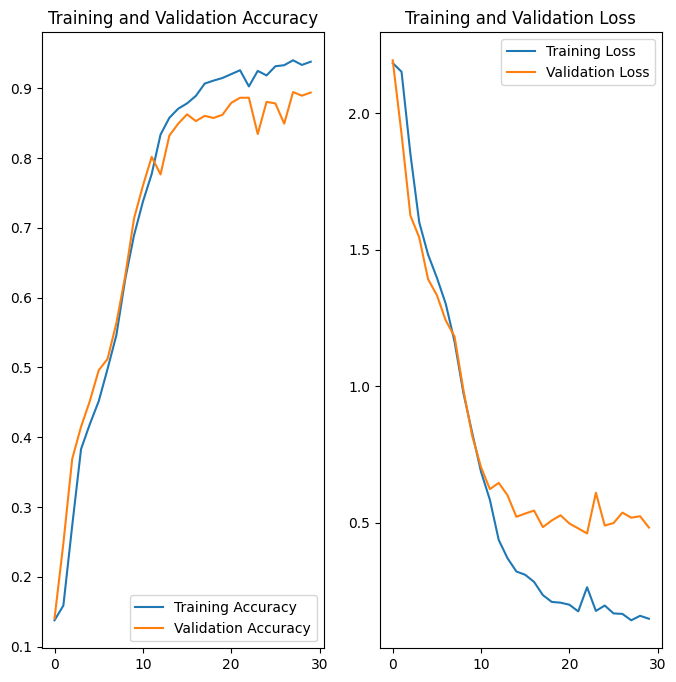

In [318]:
visual_training_results(history)